In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,  roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency
from scipy import stats
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
import joblib
from sklearn import set_config
set_config(display='diagram')
# import shap

import warnings
warnings.filterwarnings('ignore')

1. Load the dataset

In [41]:
url = 'https://raw.githubusercontent.com/everyday-data-science/Data_Science_Projects/refs/heads/main/Sony%20Research/Data/Data_Science_Challenge.csv'
df = pd.read_csv(url)
df_copy = df.copy()
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- State: The state where a customer comes from
- Account length: Number of days a customer has been using services
- Area code: The area where a customer comes from
- Phone number: The phone number of a customer
- International plan: The status of customer international plan
- Voicemail plan: The status of customer voicemail plan
- No. vmail msgs: Number of voicemail message sent by a customer
- Total day minutes: Total call minutes spent by a customer during day time
- Total day calls: Total number of calls made by a customer during day time
- Total day charge: Total amount charged to a customer during day time
- Total eve minutes: Total call minutes spent by a customer during evening time
- Total eve calls: Total number of calls made by a customer during evening time
- Total eve charge: Total amount charged to a customer during evening time
- Total night minutes: Total call minutes spent by a customer during night time
- Total night calls: Total number of calls made by a customer during night time
- Total night charge: Total amount charged to a customer during night time
- Total intl minutes: Total international call minutes spent by a customer
- Total intl calls: Total number of international calls made by a customer
- Total int charge: Total international call amount charged to a customer
- Customer service calls: Total number of customer service calls made by a customer
- Churn: Whether a customer is churned or not


2.Data Validation

3.Data Summary & Cleaning

3.1 data types

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [43]:
df['area code'] = df['area code'].astype('object') 

3.2 missing values

In [49]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

3.3 duplicate values

In [50]:
df.duplicated().sum()

0

3.3 unique values

In [52]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [53]:
df.drop(columns=df.nunique()[df.nunique() == 1].index, inplace=True)

In [56]:
df['phone number'].str.replace('-', '').str.len().value_counts()
df = df.drop('phone number', axis=1)

3.4 summary statistics

In [51]:
df.describe(include='object')

,state,area code,phone number,international plan,voice mail plan
count,3333,3333,3333,3333,3333
unique,51,3,3333,2,2
top,WV,415,382-4657,no,no
freq,106,1655,1,3010,2411


In [46]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


3.5 Class

Class Balance in dataframe (as percentages):
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


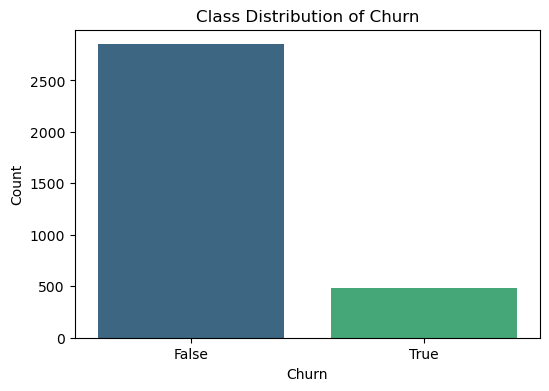

In [54]:
class_balance = df['churn'].value_counts(normalize=True) * 100
print("Class Balance in dataframe (as percentages):")
print(class_balance)

# Plot the class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Based on initial inspection, we can conclude that:
1. There are 3333 observations, each unique (no duplicates & all phone numbers unique), 20 features and 1 target variable (Churn).
2. None of the columns have any missing data.
3. The data types of all features are correct except "area code" which can be seen when we describe the numerical features. Mean "area code" doesn't make any sense and hence this data type must be changed in data pre-processing stage.
4. Most phone numbers belong to Wyoming (WY) state.
5. 3010 out of 3333 (90%) people don't have international plan and 2411 out of 3333 (72%) don't have voice mail plan.
6. Majority of columns have outliers. We need to handle them so that certain models don't get affected by outliers.
7. We have highly imbalanced dataset: 85.5% customers didn't Churn while only 14.5% did. Thus:

- This is a **classification** problem.
- Use model evaluation criteria other than accuracy (since randomly stating no customer will churn will give us 85.5% accuracy). Metrics like precision, recall, F1-score, ROC-AUC curve will become important.
- If identifying churned customers is important, make sure we perform oversampling/undersampling so that our model learns the minority class as well. Not doing this will lead to our model getting biased towards majority class.

## Data Preprocessing

- Handling Missing Data: **NOT** Required
- Handling Duplicate Data: **NOT** Required
- Correct Data Types
- Drop features if required